# Project: Bankruptcy Prevention
    
- Project Background :

  Bankruptcy is a legal process through which people or other entities who cannot repay debts to         creditors may seek relief from some or all of their debts. In most jurisdictions, bankruptcy is       imposed by a court order, often initiated by the debtor.

## Table of Contents
   1. Load data

     
     1.1 Import the libraries
     1.2 Load the dataset

   2. Exploratory Data Analysis


     2.1 Understanding dataset
     2.2 Data Visualization
     2.3 Data Cleaning
     
   3. EDA and Visualization
        
 
    3.1 Feature Selection
    3.2 Data Visualization
    3.3 Imbalanced Data
    3.4 Splitting and training

##### Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:

#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import cross_val_score


##### Load the Dataset

In [3]:
data=pd.read_excel("bankruptcy-prevention.xlsx")
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


- **About dataset:**

   This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features. The data file contains 7 features about 250 companies The data set includes the following variables:

1. industrial_risk: 0 = low risk, 0.5 = medium risk, 1 = high risk.
2. management_risk: 0 = low risk, 0.5 = medium risk, 1 = high risk.
3. financial flexibility: 0 = low flexibility, 0.5 = medium flexibility, 1 = high flexibility.
4. credibility: 0 = low credibility, 0.5 = medium credibility, 1 = high credibility.
5. competitiveness: 0 = low competitiveness, 0.5 = medium competitiveness, 1 = high competitiveness.
6. operating_risk: 0 = low risk, 0.5 = medium risk, 1 = high risk.
7. class: bankruptcy, non-bankruptcy (target variable).

## Exploratory Data Analysis

In [4]:
data.shape

(250, 7)

In [5]:
data.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


####  All 250 enteries are done in dataset no null or missing value in data

In [7]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking count of each categories for every columns

In [8]:
cat = data.columns.to_list()
print("Value count:\n")
for col in cat:
    print(col,"\n",data[col].value_counts(),"\n") 

Value count:

industrial_risk 
 1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64 

 management_risk 
 1.0    119
0.5     69
0.0     62
Name:  management_risk, dtype: int64 

 financial_flexibility 
 0.0    119
0.5     74
1.0     57
Name:  financial_flexibility, dtype: int64 

 credibility 
 0.0    94
1.0    79
0.5    77
Name:  credibility, dtype: int64 

 competitiveness 
 0.0    103
1.0     91
0.5     56
Name:  competitiveness, dtype: int64 

 operating_risk 
 1.0    114
0.0     79
0.5     57
Name:  operating_risk, dtype: int64 

 class 
 non-bankruptcy    143
bankruptcy        107
Name:  class, dtype: int64 



non-bankruptcy has a high count

In [9]:
data.nunique()

industrial_risk           3
 management_risk          3
 financial_flexibility    3
 credibility              3
 competitiveness          3
 operating_risk           3
 class                    2
dtype: int64

In [10]:
data.skew()

industrial_risk          -0.067011
 management_risk         -0.444701
 financial_flexibility    0.479134
 credibility              0.112955
 competitiveness          0.093906
 operating_risk          -0.275547
dtype: float64

##### Data visulaualization

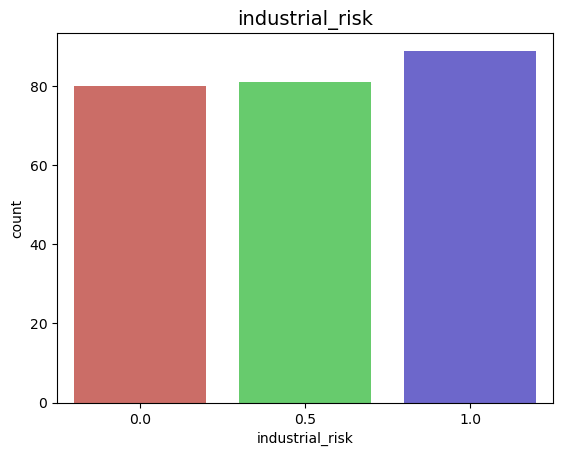

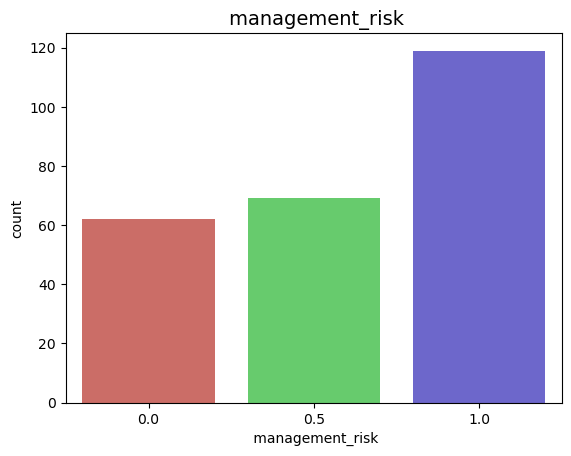

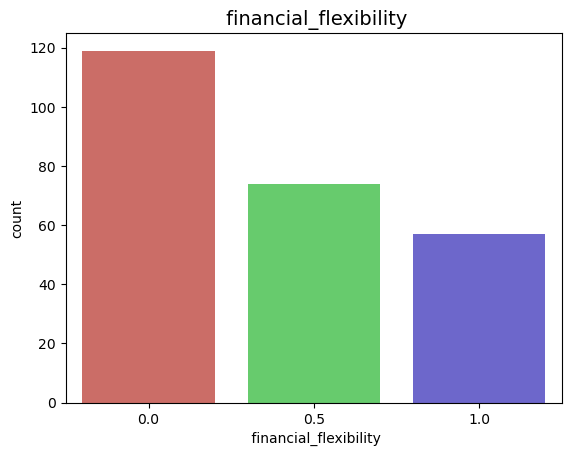

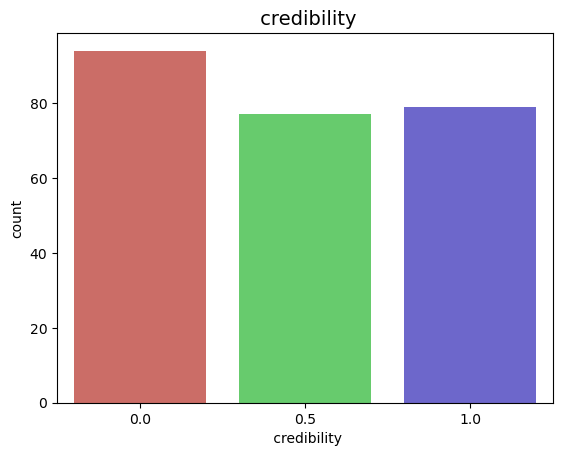

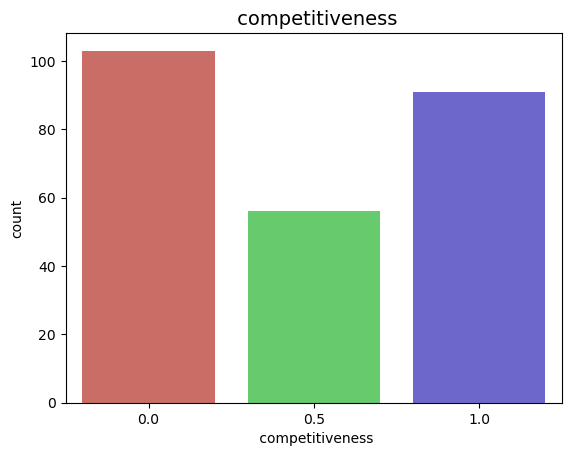

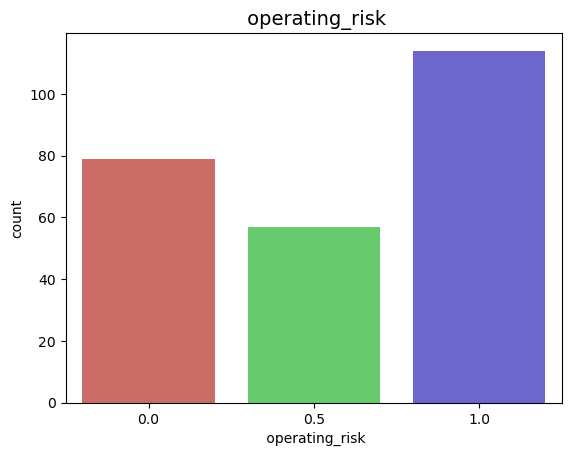

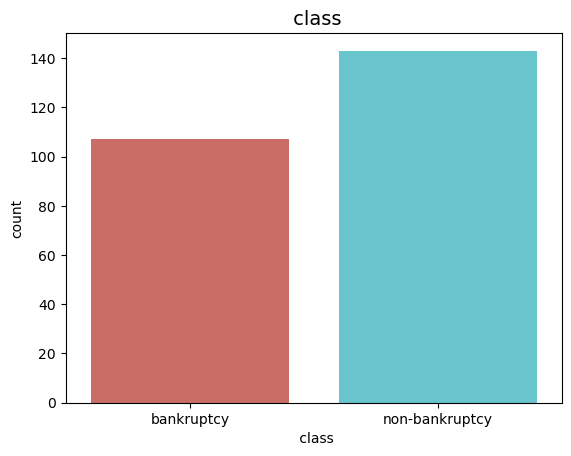

In [11]:
for col in cat[0:]:
    sns.countplot(x = col , data = data ,palette = 'hls')
    plt.title(col, fontsize = 14)
    plt.show();

Most of the industrial risk count is equal to 80 or above 80 high risk count in industrial risk

Count of Management risk is high is equal to 120 and low and medium count is betwwen 60-70

Most of finiancial fexibility is low count

credibility is almost similar in low,medium and high

In our dataset most of data competitiveness is low or high

In data opertaing risk is high 

as we can see in our data non-bankruptcy has a high count



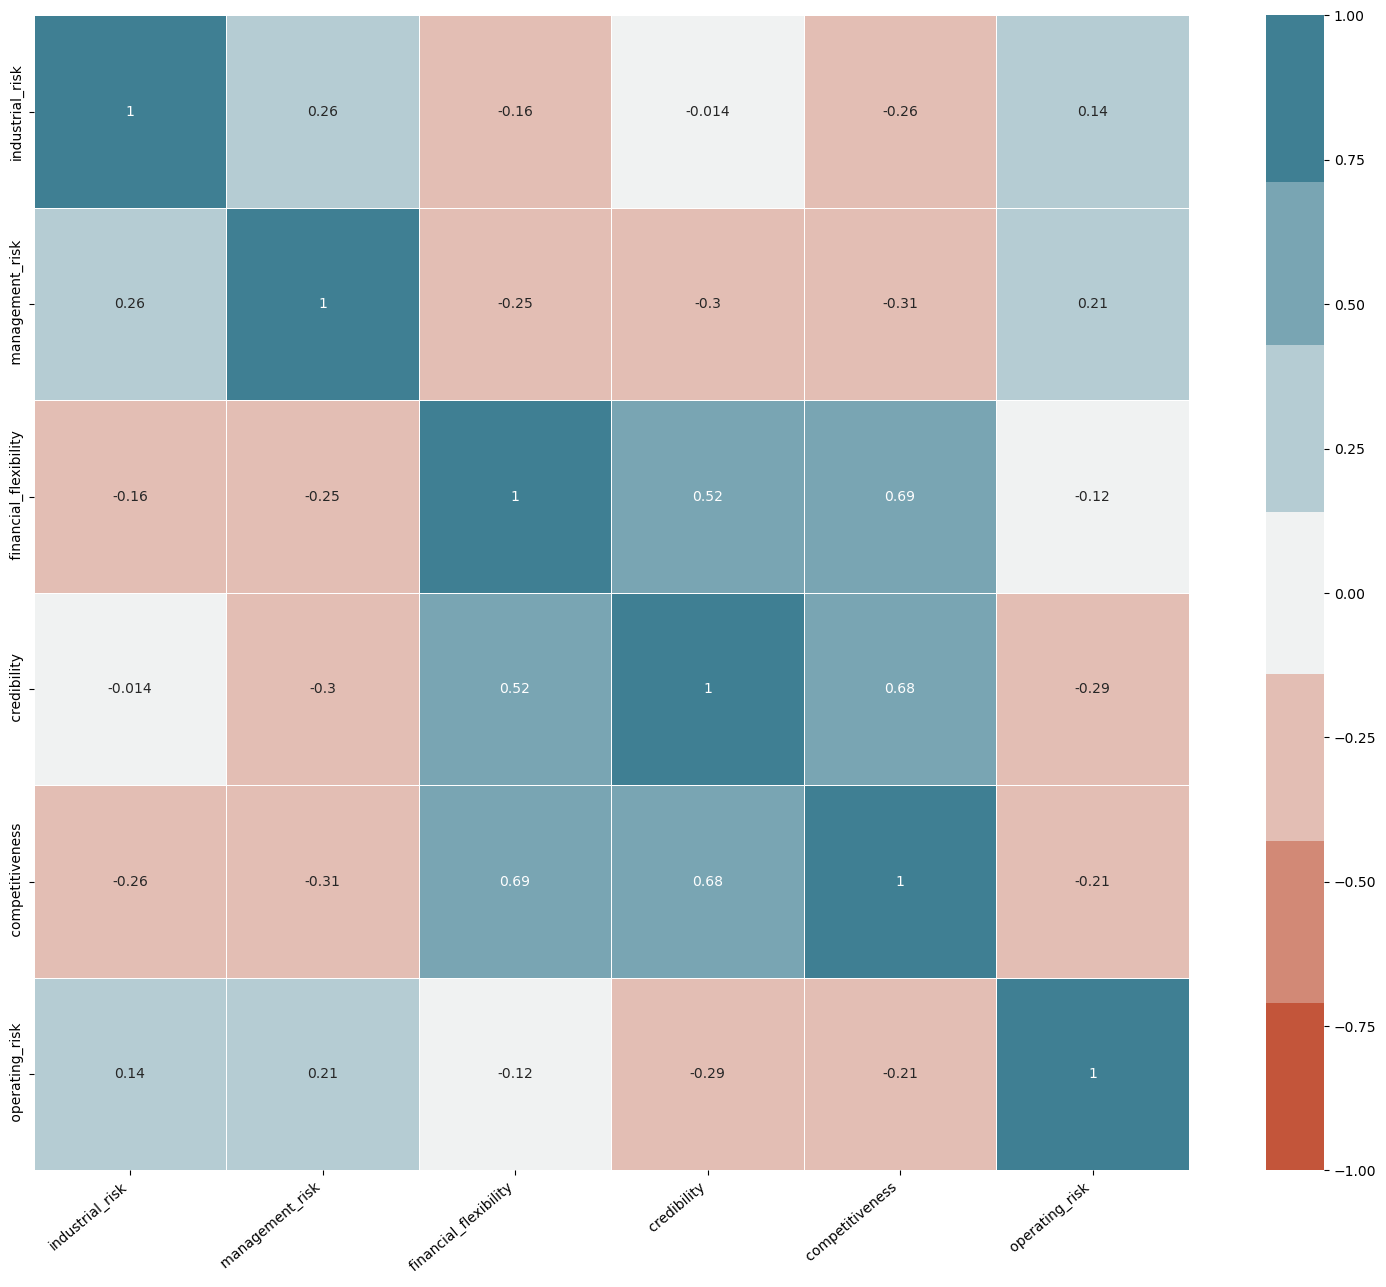

In [12]:
corr = data.corr()
plt.subplots(figsize = (20,15))
ax = sns.heatmap(
    
    corr, 
    vmin = -1, vmax = 1, center = 0, annot = True,
    cmap = sns.diverging_palette(20, 220, n = 7),
    square = True,
    linewidths = .5,

)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 40,
    horizontalalignment = 'right'
    
);

industrial risk and management risk is mostly correlated with each other

financial flexibility is highly correlated with competitivness and credibility

similarly, competitivness is correlated with financial flexibility and credibility

similar for credibility

operating risk is correlated with industrial risk and management risk



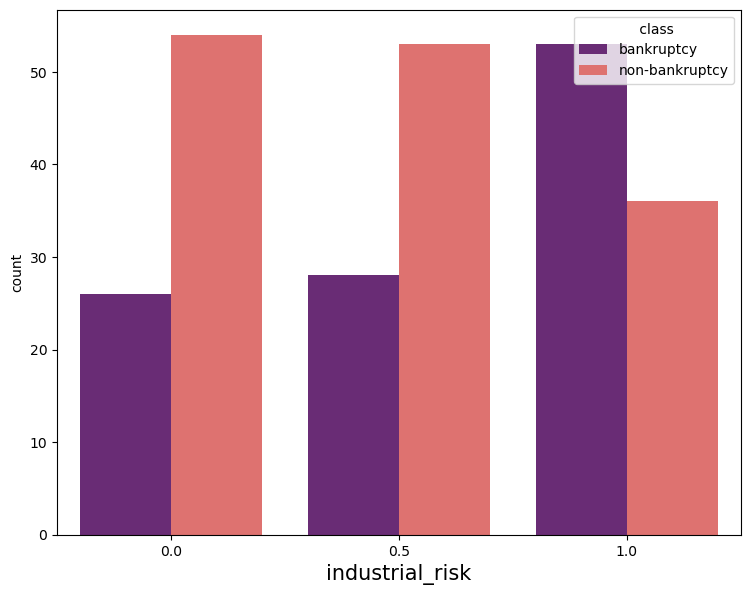

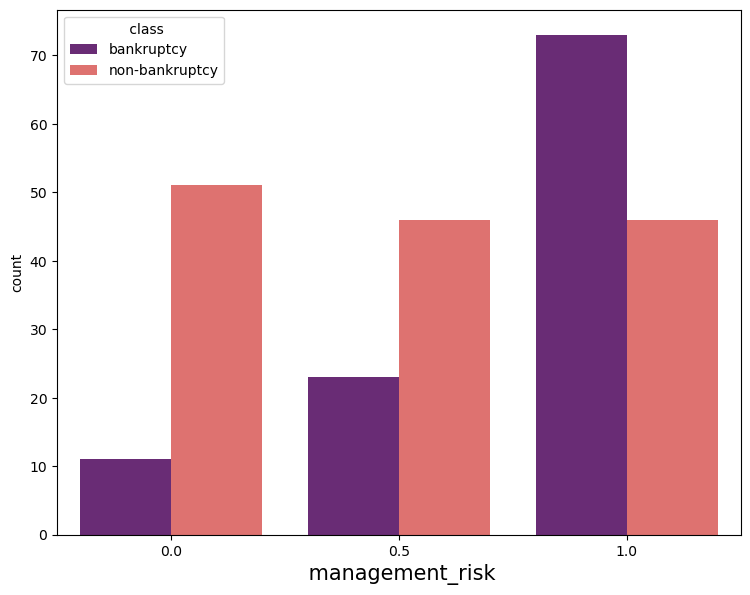

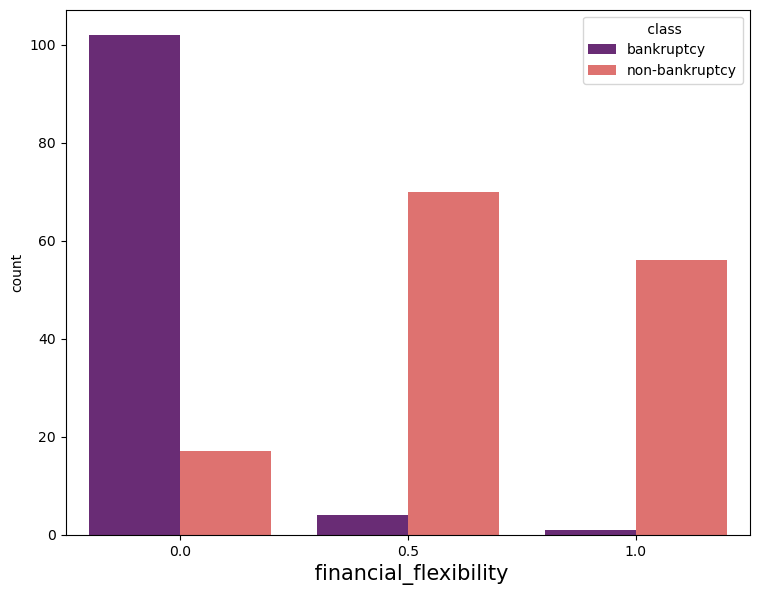

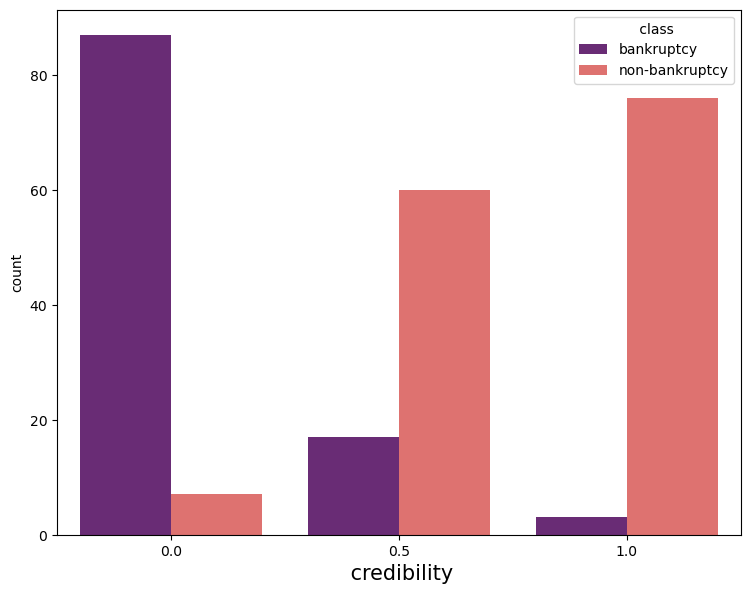

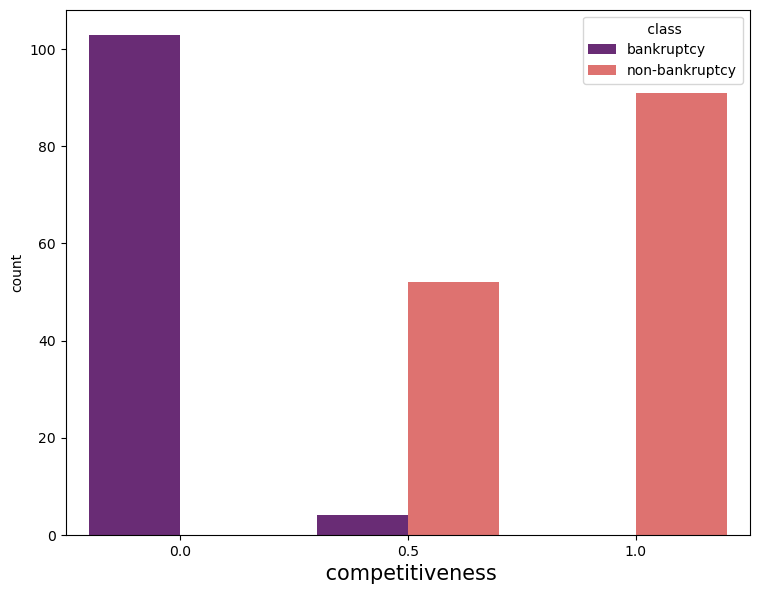

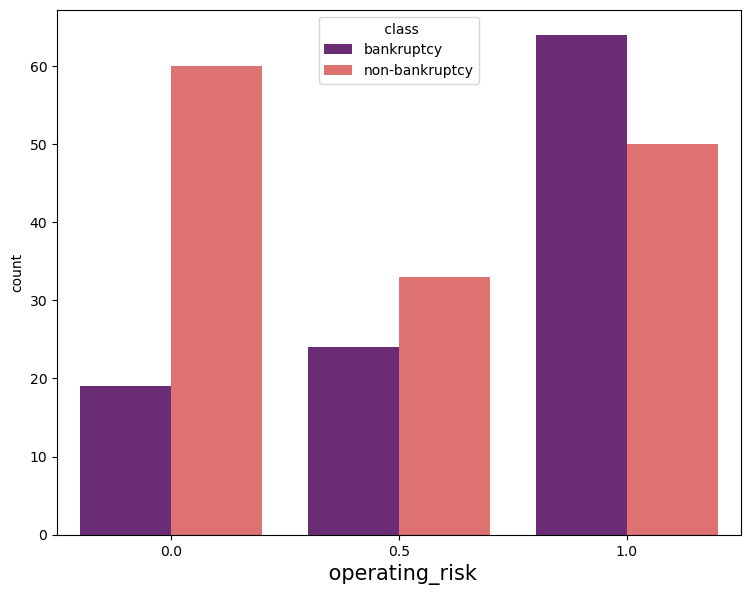

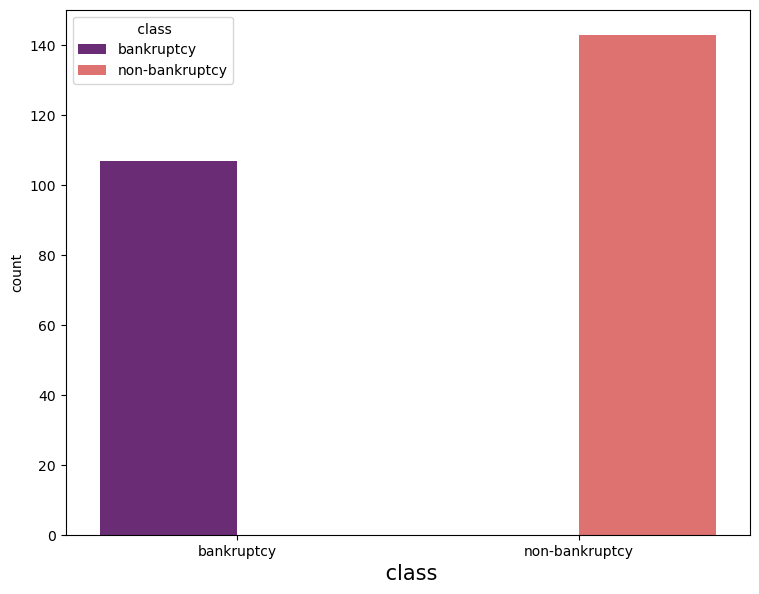

In [13]:
for col in cat[0:]: 
    plt.figure(figsize = (30,15))
    plt.subplot(2,3,1)
    sns.countplot(x = col ,hue = ' class', data = data ,palette = 'magma')
    plt.xlabel(col, fontsize = 15)

### Encoding Data

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder = LabelEncoder()
data[' class'] = label_encoder.fit_transform(data[' class']) 
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


Here bankruptcy is encoded with 0 and non-bankruptcy is encoded with 1

##### Data cleaning

In [16]:
data.duplicated().sum()

147

In [17]:
#data_cleaned=data.drop_duplicates()
#data_cleaned

In [18]:
#data_cleaned.shape

##### Outlier Detection and Treatment

<Axes: >

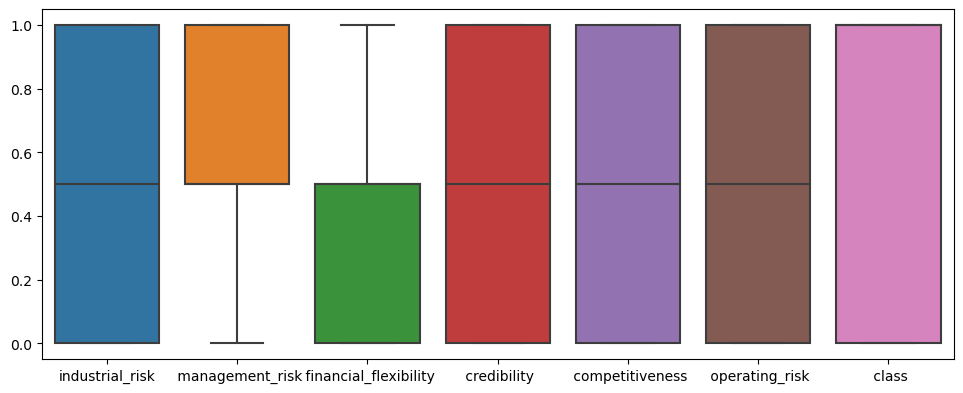

In [19]:
plt.figure(figsize = (40,10))
plt.subplot(2,3,1)   
sns.boxplot( data = data)

In [20]:
data.duplicated().sum()

147

### Normalization

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
n = MinMaxScaler()
n.fit_transform(data.iloc[:,0:5])

array([[0.5, 1. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. ],
       ...,
       [0. , 1. , 1. , 0.5, 0.5],
       [1. , 0. , 0.5, 1. , 0.5],
       [1. , 0. , 0.5, 0.5, 1. ]])

### Slicing Data

In [23]:
x = data.iloc[:,0:5]
y = data[' class']
x.shape, y.shape

((250, 5), (250,))

In [24]:
x

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness
0,0.5,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.5,0.0,0.0,0.5,0.0
4,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0
247,0.0,1.0,1.0,0.5,0.5
248,1.0,0.0,0.5,1.0,0.5


In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name:  class, Length: 250, dtype: int32

In [26]:
y.value_counts()

1    143
0    107
Name:  class, dtype: int64

### Splitting the data into training and testing set

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.3,random_state = 0)

In [29]:
x_train

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness
106,0.0,1.0,0.0,0.0,0.5
243,0.0,1.0,1.0,1.0,1.0
4,1.0,1.0,0.0,0.0,0.0
219,1.0,1.0,1.0,1.0,1.0
61,0.0,0.5,0.0,0.0,0.0
...,...,...,...,...,...
67,1.0,1.0,0.0,0.5,0.0
192,0.5,1.0,0.0,0.0,1.0
117,0.0,0.0,1.0,1.0,0.5
47,1.0,1.0,0.0,0.0,0.0


In [30]:
x_test

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness
225,0.0,0.0,1.0,1.0,0.5
122,1.0,1.0,0.5,1.0,0.5
92,0.5,1.0,0.0,0.0,0.0
157,0.0,0.5,1.0,0.5,1.0
154,0.5,0.0,1.0,1.0,1.0
...,...,...,...,...,...
240,0.0,1.0,0.5,0.5,0.5
210,0.5,0.0,0.0,1.0,0.5
170,0.5,1.0,0.0,1.0,1.0
16,0.5,1.0,0.0,0.0,0.0


In [31]:
y_train.value_counts()

1    96
0    79
Name:  class, dtype: int64

In [32]:
y_test.value_counts()

1    47
0    28
Name:  class, dtype: int64

### The Process of Modeling the Data:
    
    1.Importing the model

    2.Fitting the model

    3.Predicting class types

    4.Classification metrics
             - Score Metrics for Classification:

             - Accuracy= (TP+TN/(TP+TN+FP+FN)

             - Precision = (TP)/(TP+FP)

             - Recall = (TP)/(TP+FN)

             - f1 score - A number between 0 and 1, the harmonic mean of precision & 
               recall.

##### Models we will use:
      
      Logistic Classification

      Decision Tree Classifier

      Random Forest Regressor

      Bagging classifier

      Support Vector Machines

      K-Nearest Neighbours(KNN)
      
      AdaBoost Classification

      Naive Bayes
      
      

### Logistic Regression

In [33]:
# Import necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [34]:
#Logistic regression and fit the model

classifier_lr = LogisticRegression(random_state = 42)
classifier_lr.fit(x_train,y_train)

#Predict for X dataset

y_pred_lr = classifier_lr.predict(x_test)
y_pred_lr

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1])

In [35]:
# Confusion Matrix for the model accuracy

confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
confusion_matrix_lr

array([[28,  0],
       [ 1, 46]], dtype=int64)

In [36]:
#Classification Report 

print (classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        47

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [37]:
y_pred_df = pd.DataFrame({'actual': y,
                         'predicted': classifier_lr.predict(x),
                         'p_0': [n[0] for n in classifier_lr.predict_proba(x)],
                         'p_1': [n[1] for n in classifier_lr.predict_proba(x)]})
y_pred_df

,actual,predicted,p_0,p_1
0,0,0,0.964383,0.035617
1,0,0,0.955464,0.044536
2,0,0,0.940446,0.059554
3,0,0,0.799888,0.200112
4,0,0,0.971569,0.028431
...,...,...,...,...
245,1,1,0.005323,0.994677
246,1,1,0.026580,0.973420
247,1,1,0.095661,0.904339
248,1,1,0.073797,0.926203


In [38]:
print(accuracy_score(y_test, y_pred_lr))

0.9866666666666667


auc accuracy: 0.9893617021276595


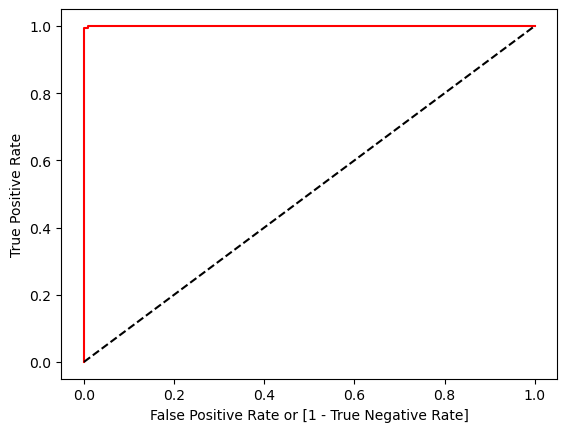

In [39]:
fpr, tpr, thresholds = roc_curve(y, classifier_lr.predict_proba(x)[:,1])

auc = roc_auc_score(y_test, y_pred_lr)

plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(thresholds)

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
print('auc accuracy:',auc)

 The auc score is 0.98 its good classifier & “elbow” close to the coordinate (0,1).

### Decision Tree

In [40]:
# Import necessary libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [41]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

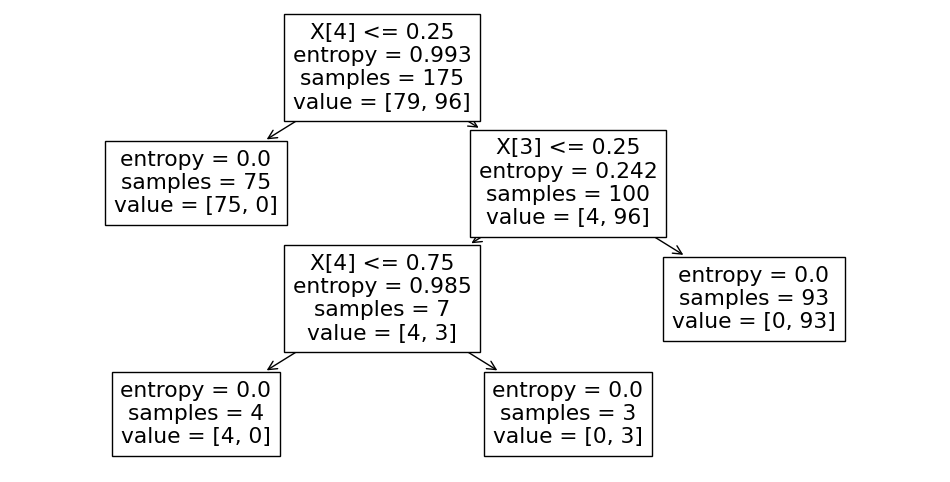

In [42]:
# Plotting Decision tree

plt.figure(figsize = (12,6))
tree.plot_tree(dt);

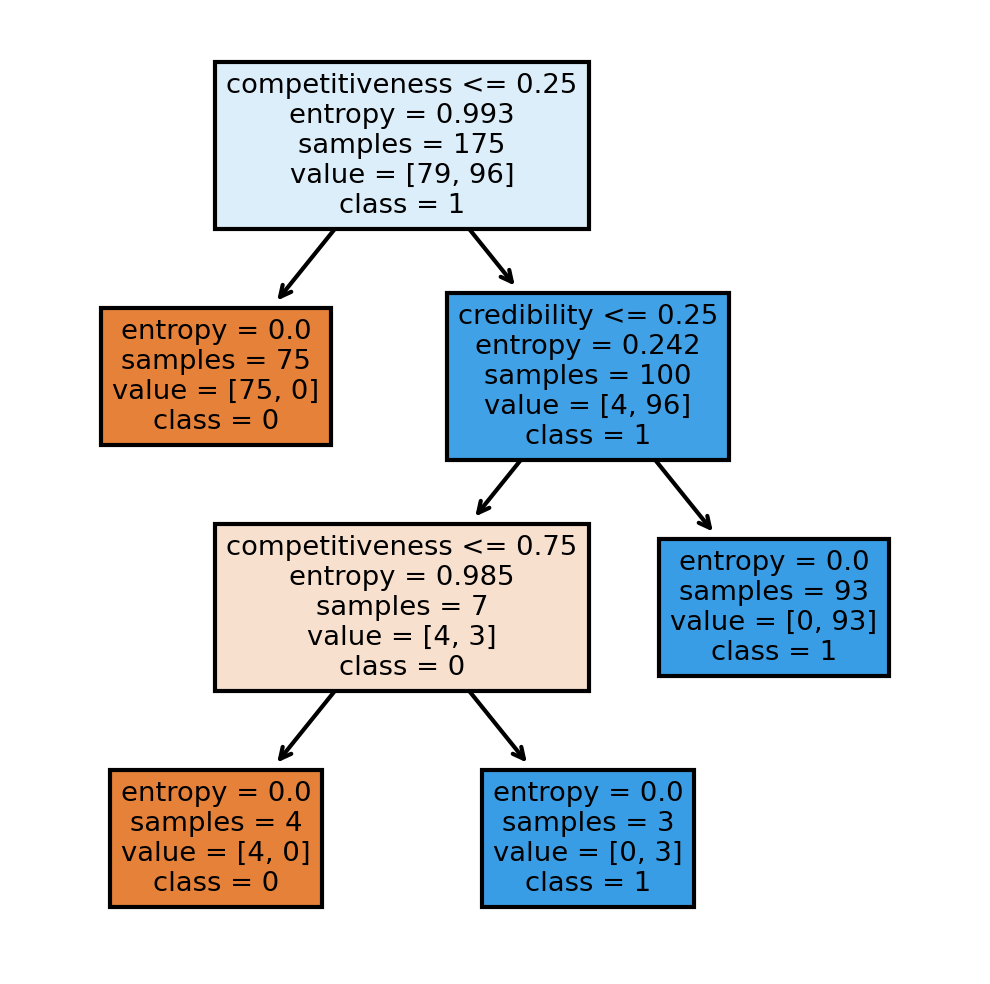

In [43]:
fn = ['industrial_risk','management_risk','financial_flexibility','credibility','competitiveness','operating_risk']
cn = ['0' , '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names = cn,
               filled = True);

In [44]:
#Predicting on test data

y_pred_dt = dt.predict(x_test)
y_pred_dt

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1])

In [45]:
pd.Series(y_pred_dt).value_counts()

1    46
0    29
dtype: int64

In [46]:
# Confusion Matrix for the model accuracy

confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
confusion_matrix_dt

array([[28,  0],
       [ 1, 46]], dtype=int64)

In [47]:
#Classification Report 

print (classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        47

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [48]:
 accuracy_score(y_test, y_pred_dt)

0.9866666666666667

#### Building Decision Tree Classifier (CART) using Gini Criteria

The Gini Index or Impurity measures the probability for a random instance being misclassified when chosen randomly.

In [49]:
dt_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 6)
dt_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [50]:
dt_gini.score(x_train, y_train)

1.0

### Random Forest  

#### Using K-folds

In [51]:
# Import necessary library

from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [52]:
kfold = KFold(n_splits = 5, random_state = 72, shuffle = True)

In [53]:
rf = RandomForestClassifier(n_estimators = 100, max_features = 3)
results_rf = cross_val_score(rf,x,y,cv = kfold)

In [54]:
print(np.mean(results_rf))

0.992


##  Bagging classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions

#### bagging for train test split

In [55]:
from sklearn.ensemble import BaggingClassifier

In [56]:
bag_c = BaggingClassifier()
bag1 = bag_c.fit(x_train,y_train)
bag1.score(x_train,y_train)

1.0

In [57]:
bag1.score(x_test,y_test)

0.9866666666666667


#### Bagging  for D.T classifier use kfold split

In [58]:
model_bag = BaggingClassifier(n_estimators = 50, random_state = 7)
result_bag = cross_val_score(model_bag, x, y, cv = kfold)

In [59]:
#Accuracy

print(result_bag.mean())

0.992


### KNN

In [60]:
# Import necessary libraries

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [61]:
model_knn = KNeighborsClassifier(n_neighbors = 2)
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [62]:
y_pred_knn = model_knn.predict(x_test)
y_pred_knn

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1])

In [63]:
#Accuracy
print(accuracy_score(y_test, y_pred_knn))

0.9866666666666667


## SVM

In [64]:
# Import necessary libraries

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [65]:
model_linear = SVC(kernel = "poly")
model_linear.fit(x_train,y_train)
y_pred_svm = model_linear.predict(x_test)
y_pred_svm

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1])

In [66]:
np.mean(y_pred_svm == y_test)

0.9866666666666667

In [67]:
print (classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        47

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



### AdaBoost Classification

In [68]:
# Import necessary library

from sklearn.ensemble import AdaBoostClassifier

In [69]:
model_ab = AdaBoostClassifier(n_estimators = 60, random_state = 8)        
result_ab = cross_val_score(model_ab, x, y, cv = kfold)
result_ab

array([1.  , 1.  , 1.  , 0.98, 1.  ])

In [70]:
#Accuracy

print(result_ab.mean())

0.9960000000000001


### Naive Byes

##### Gaussian Naive Bayes
Gaussian Naive Bayes is a classification technique used in Machine Learning (ML) based on the probabilistic approach and Gaussian distribution.

In [71]:
# Import necessary library

from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [73]:
classifier_GB = GaussianNB()
classifier_GB.fit(x_train,y_train)
y_pred_gb = model_linear.predict(x_test)
y_pred_gb

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1])

In [74]:
# Confusion Matrix for the model accuracy

confusion_matrix_gb = confusion_matrix(y_test, y_pred_gb)
confusion_matrix_gb

array([[28,  0],
       [ 1, 46]], dtype=int64)

In [75]:
#Classification report

print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        47

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [76]:
accuracy_score(y_test, y_pred_gb)

0.9866666666666667

In [77]:
data_model_acc = pd.DataFrame({'Models':['LogisticReg','DecisionTree','RandomForest','Bagging','KNN','SVM','AdaBoost','NaiveBayes'],
                               'Accuracy':[accuracy_score(y_test, y_pred_lr),
                                          accuracy_score(y_test, y_pred_dt),
                                          np.mean(results_rf),
                                          result_bag.mean(),
                                          accuracy_score(y_test, y_pred_knn),
                                          np.mean(y_pred_svm == y_test),
                                          result_ab.mean(),
                                          accuracy_score(y_test, y_pred_gb)
                                         
                                        ]})

data_model_acc   

,Models,Accuracy
0,LogisticReg,0.986667
1,DecisionTree,0.986667
2,RandomForest,0.992000
3,Bagging,0.992000
4,KNN,0.986667
5,SVM,0.986667
6,AdaBoost,0.996000
7,NaiveBayes,0.986667


## Saving Model

In [78]:
import pickle

In [79]:
!pip install pickle-mixin

In [80]:
filename = 'final_Adaboost_model.pkl'
pickle.dump(model_ab, open(filename,'wb'))

In [81]:
pickled_model = pickle.load(open('final_Adaboost_model.pkl','rb'))

In [82]:
pickled_model.fit(x,y)
pk = pickled_model.predict(x_test)
pk

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1])